In [103]:
from stocks_parser import StockParser
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Исходные данные

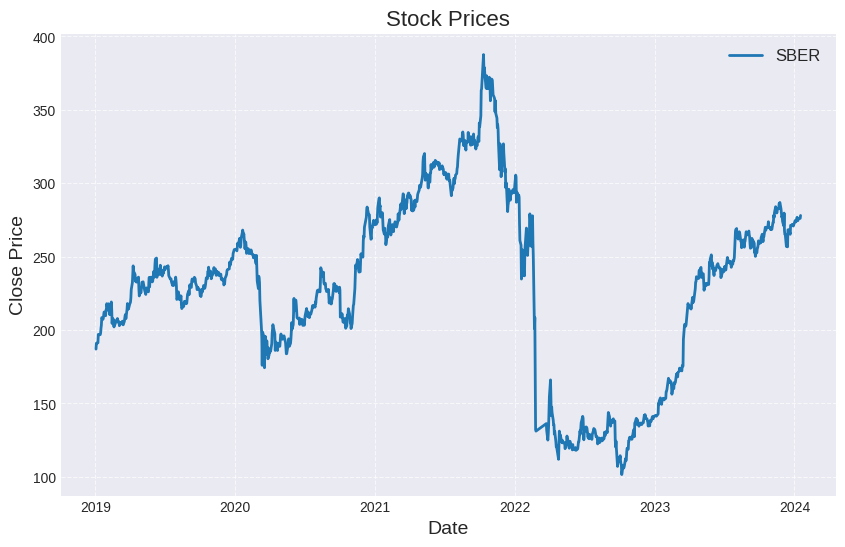

,ticker,per,date,time,open,high,low,close,vol
0,SBER,D,2019-01-03,0,186.37,191.50,186.00,186.99,40105780
1,SBER,D,2019-01-04,0,187.99,190.99,187.77,190.99,32537090
2,SBER,D,2019-01-08,0,191.66,193.18,190.37,191.24,38581950
3,SBER,D,2019-01-09,0,192.71,197.00,192.10,197.00,70633230
4,SBER,D,2019-01-10,0,196.30,197.64,195.03,196.75,56211650
...,...,...,...,...,...,...,...,...,...
1251,SBER,D,2024-01-11,0,274.62,275.97,274.01,275.71,19520470
1252,SBER,D,2024-01-12,0,275.90,276.96,274.77,275.84,17608350
1253,SBER,D,2024-01-15,0,276.30,277.73,275.21,275.96,21283290
1254,SBER,D,2024-01-16,0,276.24,276.45,274.10,276.01,16084140


In [104]:

stock_parser = StockParser(['SBER'],start_date = '2019-02-01', end_date = '2024-01-17')
stock_parser.parse_stocks()
stock_parser.plot_stock_data()
stock_data = stock_parser.get_stocks_dataframe()
stock_data=stock_data['SBER']
stock_data_no_dublicates = stock_data.drop_duplicates(subset='date', keep='last')
stock_data = stock_data.sort_values('date')
stock_data

In [105]:
stock_data = stock_data.reset_index()

stock_data['increments'] = stock_data['close'].diff()
stock_data

,index,ticker,per,date,time,open,high,low,close,vol,increments
0,0,SBER,D,2019-01-03,0,186.37,191.50,186.00,186.99,40105780,NaN
1,1,SBER,D,2019-01-04,0,187.99,190.99,187.77,190.99,32537090,4.00
2,2,SBER,D,2019-01-08,0,191.66,193.18,190.37,191.24,38581950,0.25
3,3,SBER,D,2019-01-09,0,192.71,197.00,192.10,197.00,70633230,5.76
4,4,SBER,D,2019-01-10,0,196.30,197.64,195.03,196.75,56211650,-0.25
...,...,...,...,...,...,...,...,...,...,...,...
1251,1251,SBER,D,2024-01-11,0,274.62,275.97,274.01,275.71,19520470,1.22
1252,1252,SBER,D,2024-01-12,0,275.90,276.96,274.77,275.84,17608350,0.13
1253,1253,SBER,D,2024-01-15,0,276.30,277.73,275.21,275.96,21283290,0.12
1254,1254,SBER,D,2024-01-16,0,276.24,276.45,274.10,276.01,16084140,0.05


 # Проверка на нормальность исходной выборки

p-value for the normal test: 3.0574975085989788e-239
Приращения не являются нормально распределенными.


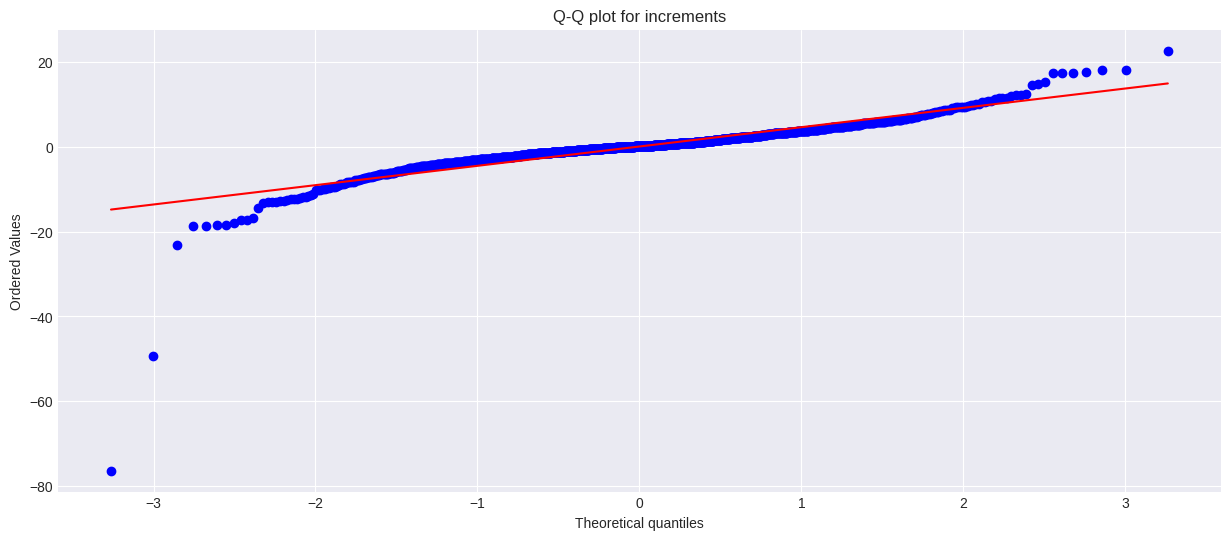

In [106]:
stock_data = stock_data.dropna()

statistic, p_value = stats.normaltest(stock_data['increments'])
print(f"p-value for the normal test: {p_value}")

if p_value > 0.05:
    print("Приращения нормально распределены.")
else:
    print("Приращения не являются нормально распределенными.")

plt.subplots(figsize=(15, 6))

stats.probplot(stock_data['increments'], dist="norm", plot=plt)
plt.title("Q-Q plot for increments")
plt.show()

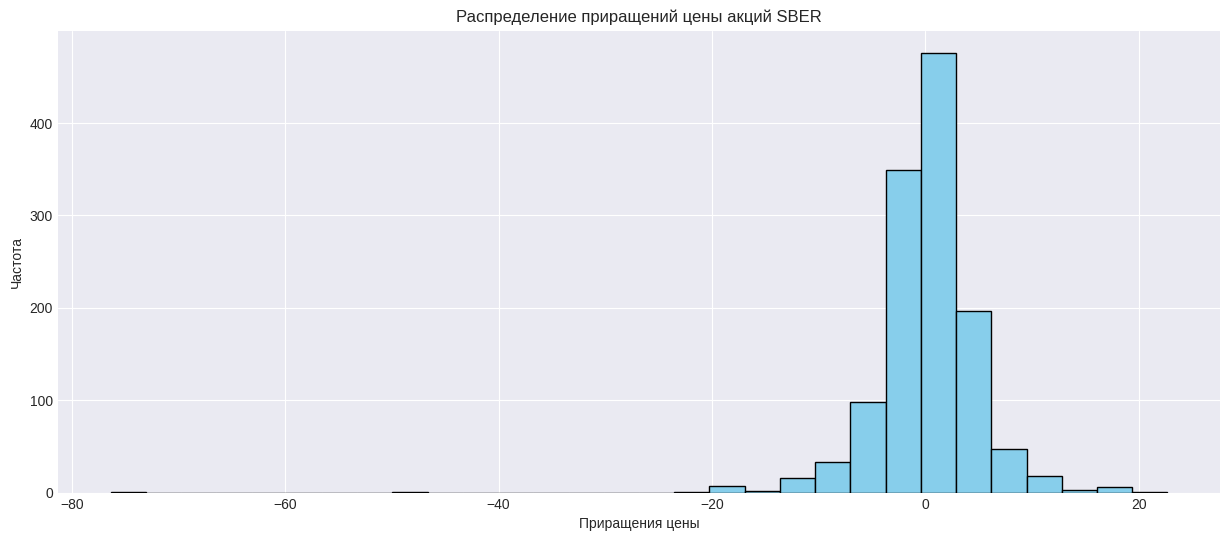

In [107]:
plt.subplots(figsize=(15, 6))
plt.hist(stock_data['increments'], bins=30, color='skyblue', edgecolor='black')
plt.title('Распределение приращений цены акций SBER')
plt.xlabel('Приращения цены')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

# Нормальность после удаления выбросов

p-value for the normal test after outlier removal: 0.9232136146540268
Приращения нормально распределены после удаления выбросов.


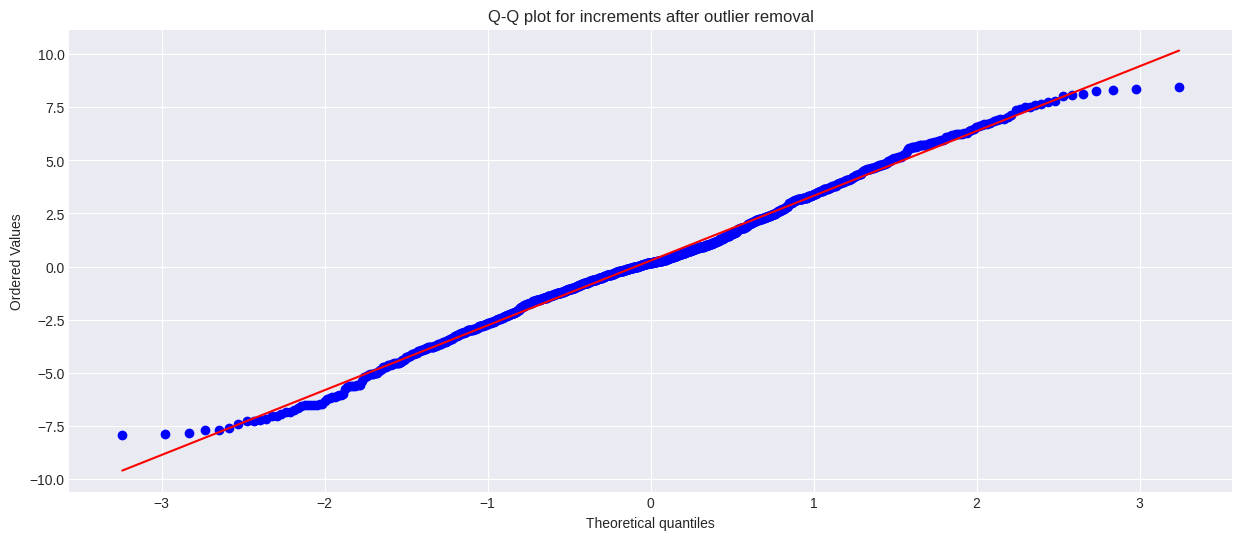

In [108]:

Q1 = stock_data['increments'].quantile(0.25)
Q3 = stock_data['increments'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


filtered_data = stock_data[(stock_data['increments'] >= lower_bound) & (stock_data['increments'] <= upper_bound)]


statistic, p_value = stats.normaltest(filtered_data['increments'])
print(f"p-value for the normal test after outlier removal: {p_value}")


if p_value > 0.05:
    print("Приращения нормально распределены после удаления выбросов.")
else:
    print("Приращения не являются нормально распределенными после удаления выбросов.")

plt.subplots(figsize=(15, 6))
stats.probplot(filtered_data['increments'], dist="norm", plot=plt)
plt.title("Q-Q plot for increments after outlier removal")
plt.show()

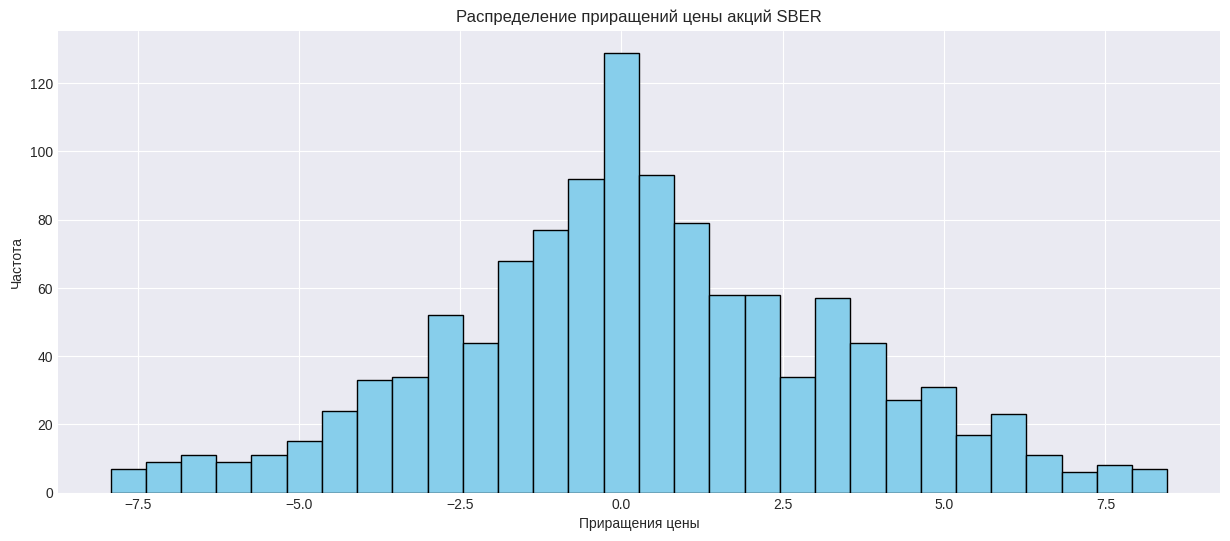

In [109]:
plt.subplots(figsize=(15, 6))
plt.hist(filtered_data['increments'], bins=30, color='skyblue', edgecolor='black')
plt.title('Распределение приращений цены акций SBER')
plt.xlabel('Приращения цены')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

Доверительный интервал для среднего приращений с доверительным уровнем 95.0%: (0.10579510648609067, 0.4556603729659644)


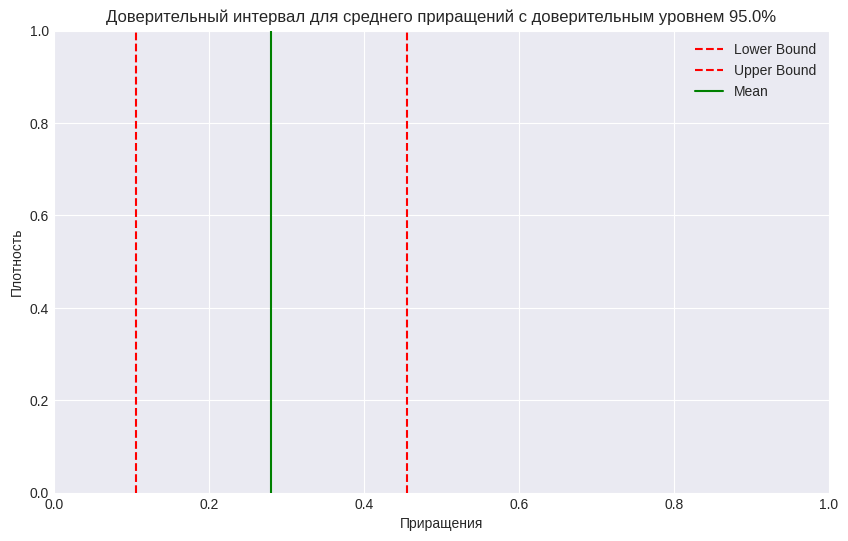

In [110]:

# Вычисление параметров нормального распределения
mean_increments = filtered_data['increments'].mean()
std_dev_increments = filtered_data['increments'].std()
n_samples = len(filtered_data['increments'])

# Уровень доверия
confidence_level = 0.95

# Доверительный интервал для среднего
z_value = stats.norm.ppf((1 + confidence_level) / 2)
margin_of_error = z_value * (std_dev_increments / np.sqrt(n_samples))
confidence_interval = (mean_increments - margin_of_error, mean_increments + margin_of_error)

print(f"Доверительный интервал для среднего приращений с доверительным уровнем {confidence_level * 100}%: {confidence_interval}")

# Визуализация доверительного интервала
plt.figure(figsize=(10, 6))
plt.axvline(x=confidence_interval[0], color='red', linestyle='--', label='Lower Bound')
plt.axvline(x=confidence_interval[1], color='red', linestyle='--', label='Upper Bound')
plt.axvline(x=mean_increments, color='green', linestyle='-', label='Mean')
plt.title(f'Доверительный интервал для среднего приращений с доверительным уровнем {confidence_level * 100}%')
plt.xlabel('Приращения')
plt.ylabel('Плотность')
plt.legend()
plt.grid(True)
plt.show()


# Проверка на Логнормальное распределение

/tmp/ipykernel_6562/398398639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['log_close'] = np.log(stock_data['close'])


p-value for the log-normal test: 7.786954181042189e-23
Данные не являются логнормально распределенными.


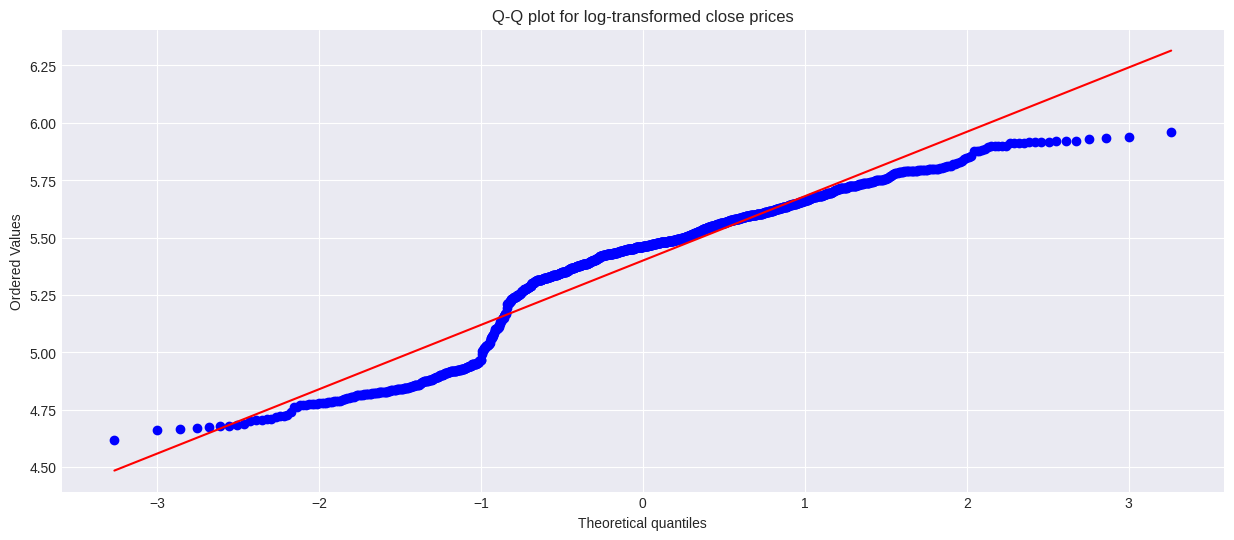

In [113]:
stock_data['log_close'] = np.log(stock_data['close'])


statistic, p_value = stats.normaltest(stock_data['log_close'])
print(f"p-value for the log-normal test: {p_value}")


if p_value > 0.05:
    print("Логнормальное распределение подтверждено.")
else:
    print("Данные не являются логнормально распределенными.")

plt.subplots(figsize=(15, 6))
stats.probplot(stock_data['log_close'], dist="norm", plot=plt)
plt.title("Q-Q plot for log-transformed close prices")
plt.show()

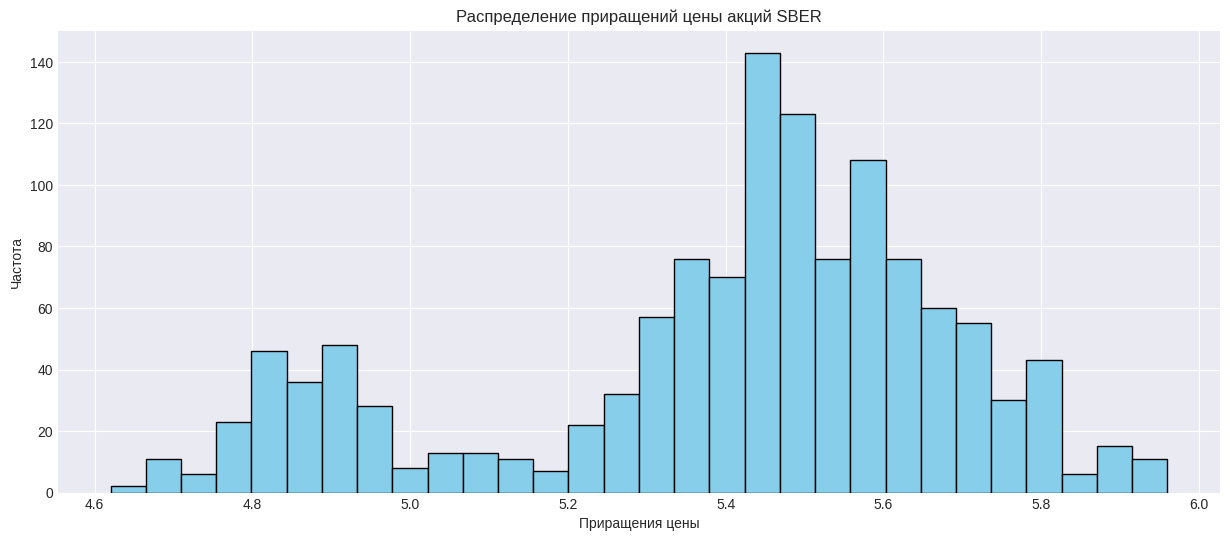

In [114]:
plt.subplots(figsize=(15, 6))
plt.hist(stock_data['log_close'], bins=30, color='skyblue', edgecolor='black')
plt.title('Распределение приращений цены акций SBER')
plt.xlabel('Приращения цены')
plt.ylabel('Частота')
plt.grid(True)
plt.show()